# Bisecting-Kmeans

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
%load_ext autoreload
%autoreload 2

from bisecting_kmeans import BisectingKMeans

In [3]:
df = pd.read_csv('../csv/df_uidFiles_2016.csv')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text
0,madikeeper12,868809325,779072240994234368,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 22 21:37:51 +0000 2016,Cieli infuocati.\n\n#picoftheday #quotesofthed...
1,madikeeper12,868809325,781615843406819329,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 29 22:05:13 +0000 2016,Prospettive.. \nunite a casa #ilselfone\n#team...
2,madikeeper12,868809325,781870800156499968,"[43.72666207, 10.41268069]",43.726662,10.412681,Fri Sep 30 14:58:19 +0000 2016,"Non occorre essere matti per lavorare qui, ma ..."
3,madikeeper12,868809325,780003801260404736,"[43.7167, 10.3833]",43.716700,10.383300,Sun Sep 25 11:19:32 +0000 2016,RunOnSunDay 🏃🏽‍♀️☀️\n#run #running #runner #ni...
4,madikeeper12,868809325,779443101123260417,"[43.70561, 10.42059]",43.705610,10.420590,Fri Sep 23 22:11:31 +0000 2016,La vita è come la fotografia sono necessari i ...
...,...,...,...,...,...,...,...,...
632,antoniocassisa,358042635,781879291911016448,"[43.7167, 10.3833]",43.716700,10.383300,Fri Sep 30 15:32:04 +0000 2016,"I mì ómini \n#son #figli #boys @ Pisa, Italy h..."
633,SefaMermer,293157588,780753755830677504,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 12:59:35 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
634,SefaMermer,293157588,780756143668953088,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 13:09:05 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
635,matteluca89,494389053,779638196258811904,"[43.71544235, 10.40051616]",43.715442,10.400516,Sat Sep 24 11:06:45 +0000 2016,Last saturday I went out with my #chinese teac...


In [4]:
X = df[['Lat', 'Lon']]
X

,Lat,Lon
0,43.726662,10.412681
1,43.726662,10.412681
2,43.726662,10.412681
3,43.716700,10.383300
4,43.705610,10.420590
...,...,...
632,43.716700,10.383300
633,43.716700,10.383300
634,43.716700,10.383300
635,43.715442,10.400516


In [5]:
X_geo = np.array(X.values.tolist())

In [6]:
max_distance_thr = 100 # meters
max_distance_thr = max_distance_thr / 1000 # kilometers

bkmeans = BisectingKMeans(min_cluster_size=1, max_distance_thr=max_distance_thr, metric='haversine', random_state=0)
bkmeans.fit(X_geo)

In [7]:
bkmeans.labels_

array([ 6,  6,  6, 15, 49, 34, 34, 47, 34, 46, 34, -1, 46, 15, 47, 34, 34,
       35, 46, 16, 15, 13, 13, 34, 15, 15, 15, 21, 34, 10, 15, 28, 34, 34,
       13, 13, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 13, 15, 15, 18,
       34, 13, 10, 34, 34, 34, 34, 34, 37, 23, 34, 34, 19, 34, 15, 34, 15,
       15, 37,  7,  7,  7, 20, 48, 15, 15, 15, 15, 13, 15, -1, 42,  5,  5,
       -1, 13, 34, 20, 10, 34, 20, -1, 15, 13, 13, 13, 34, 27, -1, 34, 34,
       10,  2, 48, 48,  2, 27, 45,  4, 11, 15, 13, 13, 34, 34, 34, 47, 47,
       15, 15, 34, 15, 46, 34, 47, 34, 34, 29, 36,  8, 13, 15, 33, 46, 27,
       15, 15, 34, 34, 31, 15, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 34, 23, 20, 34, 34, 17, 15, 34, 34, 15, 15, 15, 15, 15, 23, 49,
       38, 15, 33, 50, 25, 15, 50, 35, 15, 15, 15, 15, 34, 15, 15, 15, 34,
       34, 13, 34, 34, 34, 34, 34, 34, 48, 15, 34, 34, 34, 34, 34, 35, 35,
       10, 34, 34, 20,  8, 34, 50, 13, 11, 36, 37, 47, 34, 34, 20, 29, 34,
       34, 34, 20, 48, 26

In [8]:
values, counts = np.unique(bkmeans.labels_, return_counts=True)

In [9]:
values

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50])

In [10]:
counts

array([ 16,  11,   4,   4,   4,   2,   6,   4,   3,   3,   3,  33,   2,
         6,  61,   3, 132,  10,   3,   2,   7,  18,   2,   2,  11,   4,
         3,  16,   9,   5,   3,   2,   3,   7,   2, 163,   5,   2,   7,
         3,   2,   3,   4,   2,   4,   2,   2,   5,  15,   6,   3,   3])

In [11]:
import statistics
print ('mean cluster dimension', statistics.mean(counts))
print ('median cluster dimension', statistics.median(counts))
print ('% outliers', 16*100/sum(counts))

mean cluster dimension 12
median cluster dimension 4.0
% outliers 2.511773940345369


In [12]:
bkmeans.cluster_centers_

array([[43.73107   , 10.38272   ],
       [43.70952057, 10.40567576],
       [43.70217853, 10.38691094],
       [43.7223943 , 10.37899581],
       [43.72397195, 10.4223915 ],
       [43.69594344, 10.39858103],
       [43.72666207, 10.41268069],
       [43.72820692, 10.40570685],
       [43.71755292, 10.39497927],
       [43.71225102, 10.40067177],
       [43.72264277, 10.39495504],
       [43.716255  , 10.4001    ],
       [43.71266   , 10.39692   ],
       [43.7225127 , 10.39602735],
       [43.72121901, 10.40204388],
       [43.7167    , 10.3833    ],
       [43.71779655, 10.40211034],
       [43.71423717, 10.40216873],
       [43.71439283, 10.40413364],
       [43.72269116, 10.394098  ],
       [43.72304749, 10.39496027],
       [43.71376751, 10.41028333],
       [43.7143341 , 10.4055875 ],
       [43.70994712, 10.39890642],
       [43.71107299, 10.39892073],
       [43.71564073, 10.38991316],
       [43.72722757, 10.38937611],
       [43.69897   , 10.39904   ],
       [43.6983274 ,

In [13]:
bkmeans.sse_

0.07037831263133479

In [14]:
metrics.silhouette_score(X_geo, bkmeans.labels_, metric='euclidean')

0.8177508959704303

In [15]:
bkmeans.sse_list_

[8.056517565399138e-14,
 0.000595348648702988,
 0.0011380849568581597,
 0.0,
 0.006819112098356805,
 0.0,
 0.0,
 0.0,
 0.004642089308822057,
 0.0030065768636046613,
 0.00802490996128298,
 0.00091219515456365,
 0.0,
 0.0026977922746555883,
 0.0009344445301419336,
 7.053885945598123e-12,
 0.0012596613713223817,
 0.001375776913444043,
 0.000580927144572368,
 4.973799150320701e-14,
 0.0031531606332065735,
 0.0025172810906453546,
 0.000884341056830173,
 0.003185972067709891,
 0.001972285963359855,
 0.003869392366792365,
 0.0018532258130864242,
 0.0,
 0.000827571033151931,
 0.0027167385811243503,
 0.0,
 0.0,
 5.1268748143449064e-14,
 0.0002722900486610765,
 0.003292669116865081,
 0.0020643036715831996,
 0.0002670763196173907,
 0.0014237092444466227,
 0.0010935209492239496,
 0.0010634042159509967,
 9.325491943979299e-05,
 0.000905351398426293,
 0.0007962481478782208,
 7.878603317129259e-05,
 0.00019446593531924494,
 0.0006945052775186166,
 0.00129421959571758,
 0.0019382241110392166,
 0.00119

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

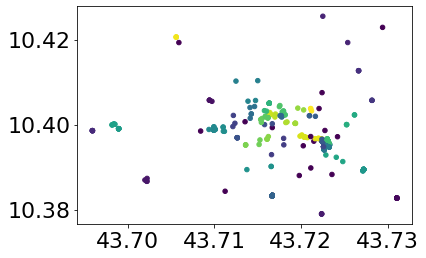

In [17]:
plt.scatter(X_geo[:,0], X_geo[:,1], c=bkmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [18]:
import folium
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

lat = [43.7359, 43.6955]
lon = [10.4269, 10.3686]

lat_mean = np.mean(lat)
lon_mean = np.mean(lon)

lat, lng = (lat_mean, lon_mean)

In [19]:
mappa = folium.Map(location=[lat, lng], zoom_start=13.2)

# set color scheme for the clusters
x = np.arange(44)
ys = [i + x + (i*x)**2 for i in range(len(np.unique(bkmeans.labels_)))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors1 = []
for lat, lng, cluster in zip(X_geo[:,0], X_geo[:,1],  bkmeans.labels_):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(mappa)

print('Mappa con clustering Bisecting Kmeans')
mappa

Mappa con clustering Bisecting Kmeans


In [20]:
df_bk = df.copy()
df_bk.insert(8, "Labels", bkmeans.labels_, True)
#X_dbscan1.sort_values(by=['Labels'])
df_bk

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text,Labels
0,madikeeper12,868809325,779072240994234368,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 22 21:37:51 +0000 2016,Cieli infuocati.\n\n#picoftheday #quotesofthed...,6
1,madikeeper12,868809325,781615843406819329,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 29 22:05:13 +0000 2016,Prospettive.. \nunite a casa #ilselfone\n#team...,6
2,madikeeper12,868809325,781870800156499968,"[43.72666207, 10.41268069]",43.726662,10.412681,Fri Sep 30 14:58:19 +0000 2016,"Non occorre essere matti per lavorare qui, ma ...",6
3,madikeeper12,868809325,780003801260404736,"[43.7167, 10.3833]",43.716700,10.383300,Sun Sep 25 11:19:32 +0000 2016,RunOnSunDay 🏃🏽‍♀️☀️\n#run #running #runner #ni...,15
4,madikeeper12,868809325,779443101123260417,"[43.70561, 10.42059]",43.705610,10.420590,Fri Sep 23 22:11:31 +0000 2016,La vita è come la fotografia sono necessari i ...,49
...,...,...,...,...,...,...,...,...,...
632,antoniocassisa,358042635,781879291911016448,"[43.7167, 10.3833]",43.716700,10.383300,Fri Sep 30 15:32:04 +0000 2016,"I mì ómini \n#son #figli #boys @ Pisa, Italy h...",15
633,SefaMermer,293157588,780753755830677504,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 12:59:35 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...,15
634,SefaMermer,293157588,780756143668953088,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 13:09:05 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...,15
635,matteluca89,494389053,779638196258811904,"[43.71544235, 10.40051616]",43.715442,10.400516,Sat Sep 24 11:06:45 +0000 2016,Last saturday I went out with my #chinese teac...,38


In [21]:
#saving the dataframe
df_bk.to_csv('../csv/df_bkmeans.csv')

# TABELLA CONFRONTO ALGORITMI DI CLUSTERING

Fai la tabella per il confronto degli algoritmi di clustering con:

<li>Nome algoritmo</li>
<li>Parametri usati</li>
<li>Numero dei cluster</li>
<li>Numero degli outliers (in percentuale)</li>
<li>Valore medio, mediano e percentile della dimensione dei cluster</li>
<li>Dimensione del cluster più grande</li>
<li>Silhouette</li>
<li>Sse </li>

-> Quindi in base a questi dati scelgo l’algoritmo migliore

In [22]:
table = pd.read_excel('../table_clustering.xlsx')

highlight = lambda x: ['background: #f2dbaa' if x.name in [5,6] else '' for i in x]

table = table.style
#table = table.background_gradient(cmap='Blues', axis=None, vmin=0, vmax=410)
table = table.hide_index()
table = table.apply(highlight, axis=1)
table

Unnamed: 0,Algorithm,Parameters,N. Clusters,Perc. Outliers,Mean (cluster dimension),Median (cluster dimension),Biggest cluster dimension,Silhouette
0,Optics1,"min_samples=10, default metric=minkowski",17,19.152276,39,16.000000,161,0.629730
1,Optics2,"min_samples=50, xi=0.05, min_cluuster_size=0.05",8,26.216641,91,64.000000,167,0.528897
2,Optics3,"min_samples=10, metric=cityblock",17,19.152276,39,16.000000,161,0.625365
3,Dbscan1,"eps=0.2, min_samples=5",15,9.733124,45,12.500000,306,0.701445
4,Dbscan2,"eps=0.3, min_samples=5",10,7.064364,70,16.000000,310,0.734527
5,Dbscan3,"eps=0.2, min_samples=3",25,3.767661,26,6.000000,306,0.755483
6,Biisecting-Kmeans,"min_cluster_size=1, max_distance_thr=100/1000 (km), metric=haversine, random_state=0",52,2.511774,12,4.000000,163,0.817751


Noto che Bisecting Kmeans e Dbscan3 hanno risultati migliori, perciò scelgo questi due.